<a href="https://colab.research.google.com/github/ksheilla/Formative3_machine_learning/blob/main/Bayesian_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load data
url = "https://raw.githubusercontent.com/ksheilla/Formative3_machine_learning/main/IMDB%20Dataset.csv"
data = pd.read_csv(url)

# Clean HTML tags
data['review'] = data['review'].str.replace('<br />', ' ', regex=False)
data['review'] = data['review'].str.replace('<br/>', ' ', regex=False)

print("Ready! Shape:", data.shape)
print(data.head(2))

Ready! Shape: (50000, 2)
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.   The filming t...  positive


In [5]:
# Choose Keywords
positive_keywords = ["great", "excellent", "amazing", "wonderful"]
negative_keywords = ["boring", "terrible", "awful", "waste"]

all_keywords = positive_keywords + negative_keywords

# Bayes Function
def compute_bayes(data, keyword):
    total_reviews = len(data)

    # Filter positive reviews
    positive_reviews = data[data['sentiment'] == 'positive']
    total_positive = len(positive_reviews)

    # Prior: P(Positive)
    prior = total_positive / total_reviews

    # Likelihood: P(keyword | Positive)
    keyword_in_positive = positive_reviews['review'].str.contains(keyword, case=False, regex=False).sum()
    likelihood = keyword_in_positive / total_positive

    # Marginal: P(keyword)
    keyword_in_all = data['review'].str.contains(keyword, case=False, regex=False).sum()
    marginal = keyword_in_all / total_reviews

    # Posterior: P(Positive | keyword)
    posterior = (prior * likelihood) / marginal

    return {
        "Keyword"             : keyword,
        "P(Positive)"         : round(prior, 4),
        "P(keyword|Positive)" : round(likelihood, 4),
        "P(keyword)"          : round(marginal, 4),
        "P(Positive|keyword)" : round(posterior, 4)
    }

# Run for All Keywords
results = []
for keyword in all_keywords:
    result = compute_bayes(data, keyword)
    results.append(result)

# Display as Table
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

  Keyword  P(Positive)  P(keyword|Positive)  P(keyword)  P(Positive|keyword)
    great          0.5               0.3712      0.2761               0.6722
excellent          0.5               0.1174      0.0725               0.8099
  amazing          0.5               0.0740      0.0496               0.7463
wonderful          0.5               0.1066      0.0650               0.8203
   boring          0.5               0.0247      0.0623               0.1983
 terrible          0.5               0.0154      0.0541               0.1419
    awful          0.5               0.0136      0.0624               0.1093
    waste          0.5               0.0145      0.0731               0.0993


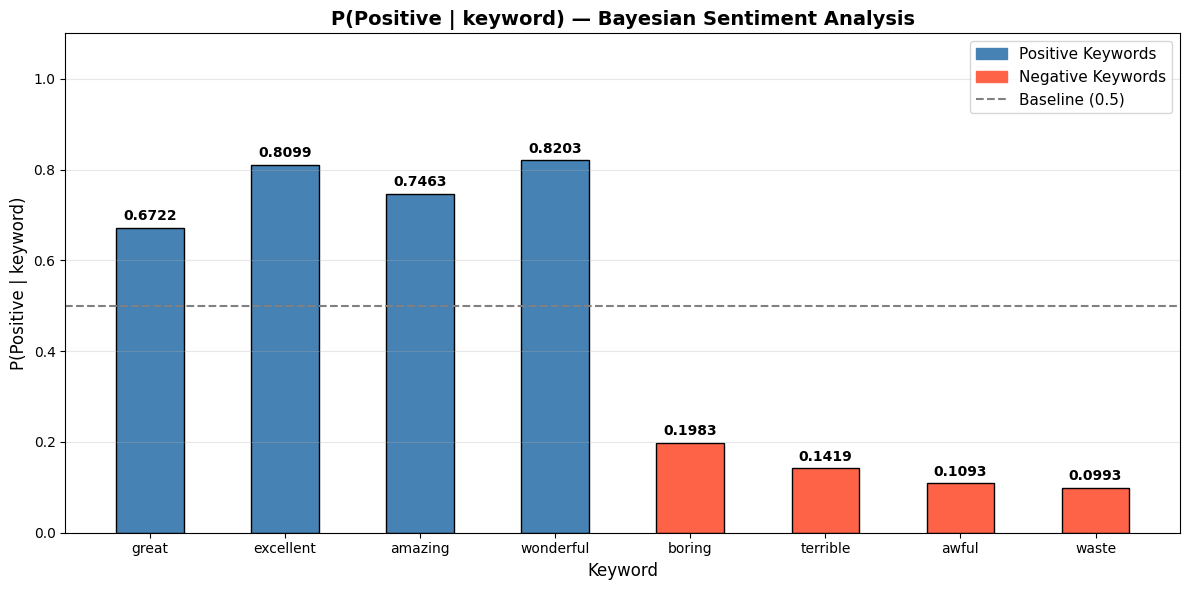


========== RESULTS INTERPRETATION ==========

  'great' → 0.6722 → Weak positive indicator
  'excellent' → 0.8099 → Strong positive indicator
  'amazing' → 0.7463 → Strong positive indicator
  'wonderful' → 0.8203 → Strong positive indicator
  'boring' → 0.1983 → Strong negative indicator
  'terrible' → 0.1419 → Strong negative indicator
  'awful' → 0.1093 → Strong negative indicator
  'waste' → 0.0993 → Strong negative indicator


In [9]:
  #========Now Visualize the data ===============


# Extract keywords and posterior probabilities from results
keywords   = [r['Keyword'] for r in results]
posteriors = [r['P(Positive|keyword)'] for r in results]

# Blue for positive keywords, Red for negative keywords
colors = ['steelblue'] * 4 + ['tomato'] * 4

fig, ax = plt.subplots(figsize=(12, 6))

# Draw bars
bars = ax.bar(keywords, posteriors, color=colors, edgecolor='black', width=0.5)

# Add value labels on top of each bar
for bar, val in zip(bars, posteriors):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{val:.4f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Baseline at 0.5 — above means positive, below means negative
ax.axhline(y=0.5, color='gray', linestyle='--', linewidth=1.5)

# Legend
blue_patch = mpatches.Patch(color='steelblue', label='Positive Keywords')
red_patch  = mpatches.Patch(color='tomato',    label='Negative Keywords')
baseline   = plt.Line2D([0], [0], color='gray', linestyle='--', label='Baseline (0.5)')
ax.legend(handles=[blue_patch, red_patch, baseline], fontsize=11)

# Labels and formatting
ax.set_title('P(Positive | keyword) — Bayesian Sentiment Analysis', fontsize=14, fontweight='bold')
ax.set_xlabel('Keyword', fontsize=12)
ax.set_ylabel('P(Positive | keyword)', fontsize=12)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('bayesian_results.png', dpi=150)
plt.show()

# Print interpretation
print("\n========== RESULTS INTERPRETATION ==========\n")
for result in results:
    kw   = result['Keyword']
    post = result['P(Positive|keyword)']

    if post >= 0.7:
        meaning = "Strong positive indicator"
    elif post >= 0.5:
        meaning = "Weak positive indicator"
    elif post >= 0.3:
        meaning = "Weak negative indicator"
    else:
        meaning = "Strong negative indicator"

    print(f"  '{kw}' → {post} → {meaning}")